In [6]:
import os
import platform
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import pandas as pd
from typing import Optional
import logging as lg
import numpy as np

myLogger = lg.getLogger()
myLogger.setLevel(lg.INFO)

# set plt attrs
def set_plt() -> None:
    ## set plt minus font
    plt.rcParams["axes.unicode_minus"] = False

    ## set font
    system_name: str = platform.system()
    if system_name == "Windows":
        # Windows
        plt.rc("font", family="Malgun Gothic")
    elif system_name == "Darwin":
        # Mac
        plt.rc("font", family="AppleGothic")
    elif system_name == "Linux":
        # Linux
        path = "/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf"
        font_name = font_manager.FontProperties(fname=path, size=12)
        plt.rc("font", family=font_name)
    else:
        print("Not support")


# get all data from data folder
def get_data() -> dict[str, pd.DataFrame]:
    cur_path: str = os.getcwd()
    names: list[str] = os.listdir(os.path.join(cur_path, "files"))

    names = list(filter(lambda x:x.split('.')[1] in ['csv','xls'],names))
    data: Optional[dict[str, pd.DataFrame]] = {}
    
    for f_n in names:
        abs_path: str = os.path.join(cur_path, "files\\{}".format(f_n))
        try:
            if f_n.endswith(".csv"):
                data[f_n] = pd.read_csv(abs_path, encoding="euc-kr")
            elif f_n.endswith(".xlsx") or f_n.endswith("xls"):
                data[f_n] = pd.read_excel(abs_path)
            else:
                data["None"] = pd.DataFrame({})
        except UnicodeDecodeError as ue:
            # error occur because of encoding method
            myLogger.error("Warning encoding \"euc-kr\" failed at : {}".format(abs_path))
            data[f_n] = pd.read_csv(abs_path)

    return data


In [7]:
"""
df['파일이름.csv'] 하면 해당 파일의 DataFrame을 가져옵니다.
"""

set_plt()
df = get_data()


In [8]:
# 행사 : 공연행사
# 고독사 : 1인가구비율
# 고독사 : 독거노인가구비율
# 연도별 무연고 사망자


### 공연행사

In [9]:
# 데이터 전처리
g = df['전국공연행사정보표준데이터.csv']

# Check the missing value
np.sum(pd.isnull(g))

# 행사시작일자 누락값 : 0

#country_dropna = g.dropna() 

#print(np.count_nonzero(country_dropna.isnull())) # 누락값 0

행사명            0
장소             0
행사내용           0
행사시작일자         0
행사종료일자         0
행사시작시각         0
행사종료시각      1302
요금정보           0
주관기관           0
주최기관           0
전화번호        1040
후원기관        6308
객석수         2412
관람요금        1721
입장연령        1614
할인정보        4637
유의사항        6073
홈페이지주소      1615
예매정보        3072
주차장보유여부        0
소재지도로명주소      94
소재지지번주소     1532
위도           743
경도           743
데이터기준일자        0
제공기관코드         0
제공기관명          0
dtype: int64

* 년도별로 행사 갯수 (월별)
* 지역별로 행사 갯수 (전체 지역별, 년도별 지역별)

In [10]:
# 년도별 행사 갯수 (행사시작일자 기준)
print(g['행사시작일자']) # object : 문자형

# date타입으로 바꿔줘야함
g['date'] = pd.to_datetime(g['행사시작일자'])
print(g['date'].head())


0       2021-07-17
1       2017-01-17
2       2017-01-25
3       2017-03-29
4       2017-04-06
           ...    
7712    2021-10-27
7713    2021-10-30
7714    2021-11-02
7715    2021-11-02
7716    2021-11-02
Name: 행사시작일자, Length: 7717, dtype: object
0   2021-07-17
1   2017-01-17
2   2017-01-25
3   2017-03-29
4   2017-04-06
Name: date, dtype: datetime64[ns]


In [11]:
# 년도 뽑아내기
g['year'] = g['date'].dt.year
g['year'].head()

0    2021
1    2017
2    2017
3    2017
4    2017
Name: year, dtype: int64

year
2010       1
2012       1
2013      35
2014      74
2015     300
2016     494
2017    1006
2018     954
2019    1332
2020     735
2021    2642
2022     143
Name: date, dtype: int64


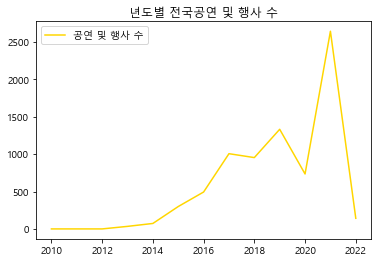

In [12]:
a = g.groupby(by=['year']).count()
count = a['date']
print(count)

plt.title('년도별 전국공연 및 행사 수')
plt.plot(count,color='#FFD600',label='공연 및 행사 수')
plt.legend()
plt.show()


### 1인가구비율

In [13]:
# 데이터 전처리
gagu = pd.read_csv('.\\files\\1인가구비율_시도_시_군_구.csv', encoding="euc-kr", header=[0,1])

# Check the missing value
np.sum(pd.isnull(gagu)) # 누락값 0


행정구역별  행정구역별                      0
2000   1인가구비율<br>(A÷B×100) (%)    0
       1인가구<br>(A) (가구)           0
       일반가구<br>(B) (가구)           0
2005   1인가구비율<br>(A÷B×100) (%)    0
       1인가구<br>(A) (가구)           0
       일반가구<br>(B) (가구)           0
2010   1인가구비율<br>(A÷B×100) (%)    0
       1인가구<br>(A) (가구)           0
       일반가구<br>(B) (가구)           0
2015   1인가구비율<br>(A÷B×100) (%)    0
       1인가구<br>(A) (가구)           0
       일반가구<br>(B) (가구)           0
2016   1인가구비율<br>(A÷B×100) (%)    0
       1인가구<br>(A) (가구)           0
       일반가구<br>(B) (가구)           0
2017   1인가구비율<br>(A÷B×100) (%)    0
       1인가구<br>(A) (가구)           0
       일반가구<br>(B) (가구)           0
2018   1인가구비율<br>(A÷B×100) (%)    0
       1인가구<br>(A) (가구)           0
       일반가구<br>(B) (가구)           0
2019   1인가구비율<br>(A÷B×100) (%)    0
       1인가구<br>(A) (가구)           0
       일반가구<br>(B) (가구)           0
2020   1인가구비율<br>(A÷B×100) (%)    0
       1인가구<br>(A) (가구)           0
       일반가구<br>(B) (가구)     

In [14]:
gagu.head(1)

행정구역별                    2000                                    \
  행정구역별 1인가구비율<br>(A÷B×100) (%) 1인가구<br>(A) (가구) 일반가구<br>(B) (가구)   
0    전국                    15.5          2224433         14311807   

                     2005                                    \
  1인가구비율<br>(A÷B×100) (%) 1인가구<br>(A) (가구) 일반가구<br>(B) (가구)   
0                      20          3170675         15887128   

                     2010                                    ...  \
  1인가구비율<br>(A÷B×100) (%) 1인가구<br>(A) (가구) 일반가구<br>(B) (가구)  ...   
0                    23.9          4142165         17339422  ...   

              2017                    2018                                    \
  일반가구<br>(B) (가구) 1인가구비율<br>(A÷B×100) (%) 1인가구<br>(A) (가구) 일반가구<br>(B) (가구)   
0         19673875                    29.3          5848594         19979188   

                     2019                                    \
  1인가구비율<br>(A÷B×100) (%) 1인가구<br>(A) (가구) 일반가구<br>(B) (가구)   
0                    30.2          6147516         20343188   

                     2020                                    
  1인가구비율<br>(A÷B×100) (%) 1인가구<br>(A) (가구) 일반가구<br>(B) (가구)  
0                    31.7          6643354         20926710  

[1 rows x 28 columns]

In [15]:
index = gagu.columns.get_level_values(0)
set(index)

{'2000',
 '2005',
 '2010',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '행정구역별'}

In [16]:
gagu.columns.get_level_values(1)

Index(['행정구역별', '1인가구비율<br>(A÷B×100) (%)', '1인가구<br>(A) (가구)',
       '일반가구<br>(B) (가구)', '1인가구비율<br>(A÷B×100) (%)', '1인가구<br>(A) (가구)',
       '일반가구<br>(B) (가구)', '1인가구비율<br>(A÷B×100) (%)', '1인가구<br>(A) (가구)',
       '일반가구<br>(B) (가구)', '1인가구비율<br>(A÷B×100) (%)', '1인가구<br>(A) (가구)',
       '일반가구<br>(B) (가구)', '1인가구비율<br>(A÷B×100) (%)', '1인가구<br>(A) (가구)',
       '일반가구<br>(B) (가구)', '1인가구비율<br>(A÷B×100) (%)', '1인가구<br>(A) (가구)',
       '일반가구<br>(B) (가구)', '1인가구비율<br>(A÷B×100) (%)', '1인가구<br>(A) (가구)',
       '일반가구<br>(B) (가구)', '1인가구비율<br>(A÷B×100) (%)', '1인가구<br>(A) (가구)',
       '일반가구<br>(B) (가구)', '1인가구비율<br>(A÷B×100) (%)', '1인가구<br>(A) (가구)',
       '일반가구<br>(B) (가구)'],
      dtype='object')

In [17]:
# 전국의 1인가구비율
gagu_b = {}
gagu_b['2000'] = gagu.loc[0,('2000','1인가구비율<br>(A÷B×100) (%)')]
gagu_b['2005'] = gagu.loc[0,('2005','1인가구비율<br>(A÷B×100) (%)')]
gagu_b['2010'] = gagu.loc[0,('2010','1인가구비율<br>(A÷B×100) (%)')]
gagu_b['2015'] = gagu.loc[0,('2015','1인가구비율<br>(A÷B×100) (%)')]
gagu_b['2016'] = gagu.loc[0,('2016','1인가구비율<br>(A÷B×100) (%)')]
gagu_b['2017'] = gagu.loc[0,('2017','1인가구비율<br>(A÷B×100) (%)')]
gagu_b['2018'] = gagu.loc[0,('2018','1인가구비율<br>(A÷B×100) (%)')]
gagu_b['2019'] = gagu.loc[0,('2019','1인가구비율<br>(A÷B×100) (%)')]
gagu_b['2020'] = gagu.loc[0,('2020','1인가구비율<br>(A÷B×100) (%)')]
print(gagu_b)


{'2000': '15.5', '2005': '20', '2010': '23.9', '2015': '27.2', '2016': '27.9', '2017': '28.6', '2018': '29.3', '2019': '30.2', '2020': '31.7'}


In [18]:
x_gagu = list(gagu_b.keys())
y_gagu = list(map(float, gagu_b.values())) 

print(x_gagu,'\n',y_gagu)

['2000', '2005', '2010', '2015', '2016', '2017', '2018', '2019', '2020'] 
 [15.5, 20.0, 23.9, 27.2, 27.9, 28.6, 29.3, 30.2, 31.7]


In [19]:
# 전국의 1인가구
gagu_1 = {}
gagu_1['2000'] = gagu.loc[0,('2000','1인가구<br>(A) (가구)')]
gagu_1['2005'] = gagu.loc[0,('2005','1인가구<br>(A) (가구)')]
gagu_1['2010'] = gagu.loc[0,('2010','1인가구<br>(A) (가구)')]
gagu_1['2015'] = gagu.loc[0,('2015','1인가구<br>(A) (가구)')]
gagu_1['2016'] = gagu.loc[0,('2016','1인가구<br>(A) (가구)')]
gagu_1['2017'] = gagu.loc[0,('2017','1인가구<br>(A) (가구)')]
gagu_1['2018'] = gagu.loc[0,('2018','1인가구<br>(A) (가구)')]
gagu_1['2019'] = gagu.loc[0,('2019','1인가구<br>(A) (가구)')]
gagu_1['2020'] = gagu.loc[0,('2020','1인가구<br>(A) (가구)')]
print(gagu_1)


{'2000': '2224433', '2005': '3170675', '2010': '4142165', '2015': '5203440', '2016': '5397615', '2017': '5618677', '2018': '5848594', '2019': '6147516', '2020': '6643354'}


In [20]:
# 전국의 일반가구
gagu_2 = {}
gagu_2['2000'] = gagu.loc[0,('2000','일반가구<br>(B) (가구)')]
gagu_2['2005'] = gagu.loc[0,('2005','일반가구<br>(B) (가구)')]
gagu_2['2010'] = gagu.loc[0,('2010','일반가구<br>(B) (가구)')]
gagu_2['2015'] = gagu.loc[0,('2015','일반가구<br>(B) (가구)')]
gagu_2['2016'] = gagu.loc[0,('2016','일반가구<br>(B) (가구)')]
gagu_2['2017'] = gagu.loc[0,('2017','일반가구<br>(B) (가구)')]
gagu_2['2018'] = gagu.loc[0,('2018','일반가구<br>(B) (가구)')]
gagu_2['2019'] = gagu.loc[0,('2019','일반가구<br>(B) (가구)')]
gagu_2['2020'] = gagu.loc[0,('2020','일반가구<br>(B) (가구)')]
print(gagu_2)

{'2000': '14311807', '2005': '15887128', '2010': '17339422', '2015': '19111030', '2016': '19367696', '2017': '19673875', '2018': '19979188', '2019': '20343188', '2020': '20926710'}


In [21]:
x_gagu_b = list(gagu_b.keys())
y_gagu_b = list(map(float, gagu_b.values())) 
# 1인가구
x_gagu_1 = list(gagu_1.keys())
y_gagu_1 = list(map(int, gagu_1.values()))
# 일반가구
x_gagu_2 = list(gagu_2.keys())
y_gagu_2 = list(map(int, gagu_2.values()))

print(x_gagu_b,'\n',y_gagu_b)
print(x_gagu_1,'\n',y_gagu_1)
print(x_gagu_2,'\n',y_gagu_2)

['2000', '2005', '2010', '2015', '2016', '2017', '2018', '2019', '2020'] 
 [15.5, 20.0, 23.9, 27.2, 27.9, 28.6, 29.3, 30.2, 31.7]
['2000', '2005', '2010', '2015', '2016', '2017', '2018', '2019', '2020'] 
 [2224433, 3170675, 4142165, 5203440, 5397615, 5618677, 5848594, 6147516, 6643354]
['2000', '2005', '2010', '2015', '2016', '2017', '2018', '2019', '2020'] 
 [14311807, 15887128, 17339422, 19111030, 19367696, 19673875, 19979188, 20343188, 20926710]


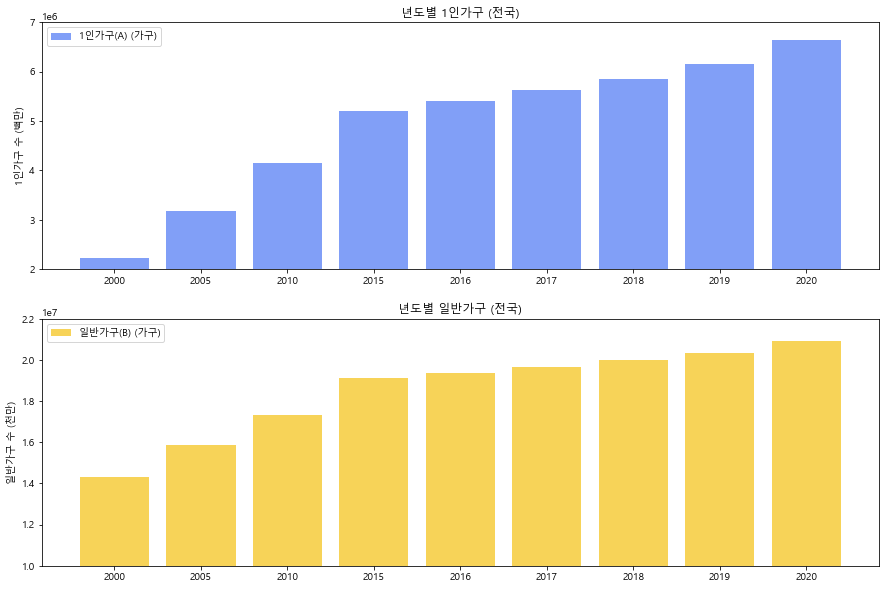

In [22]:
# bar
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.bar(x_gagu_1, y_gagu_1,color = '#819FF7',label = '1인가구(A) (가구)')
plt.title('년도별 1인가구 (전국)')
plt.ylim(2000000,7000000)
plt.ylabel('1인가구 수 (백만)')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(x_gagu_2, y_gagu_2, color = '#F7D358', label = '일반가구(B) (가구)')
plt.title('년도별 일반가구 (전국)')
plt.ylim(10000000,22000000)
plt.ylabel('일반가구 수 (천만)')
plt.legend()

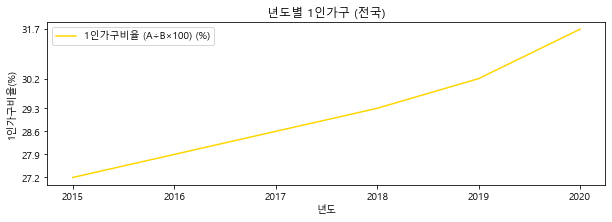

In [23]:
plt.figure(figsize=(10,3))

plt.title('년도별 1인가구 (전국)')
plt.plot(x_gagu_b[3:],y_gagu_b[3:],color='#FFD600',label = '1인가구비율 (A÷B×100) (%)')
plt.xlabel('년도')
plt.ylabel('1인가구비율(%)')
plt.yticks(y_gagu_b[3:])

plt.legend()
# plt.xticks(x)

### 독거노인가구비율

In [24]:
# 데이터 전처리
noin = pd.read_csv('.\\files\\독거노인가구비율_시도_시_군_구.csv', encoding="euc-kr", header=[0,1])
 
# pd.read_csv('.\\files\\1인가구비율_시도_시_군_구.csv', encoding="euc-kr", header=[0,1])
# df['독거노인가구비율_시도_시_군_구.csv']

# Check the missing value
np.sum(pd.isnull(noin))

행정구역별  행정구역별                        0
2000   독거노인가구비율<br>(A÷B×100) (%)    0
       65세이상 1인가구<br>(A) (가구)       0
       전체 일반가구<br>(B) (가구)          0
2005   독거노인가구비율<br>(A÷B×100) (%)    0
       65세이상 1인가구<br>(A) (가구)       0
       전체 일반가구<br>(B) (가구)          0
2010   독거노인가구비율<br>(A÷B×100) (%)    0
       65세이상 1인가구<br>(A) (가구)       0
       전체 일반가구<br>(B) (가구)          0
2015   독거노인가구비율<br>(A÷B×100) (%)    0
       65세이상 1인가구<br>(A) (가구)       0
       전체 일반가구<br>(B) (가구)          0
2016   독거노인가구비율<br>(A÷B×100) (%)    0
       65세이상 1인가구<br>(A) (가구)       0
       전체 일반가구<br>(B) (가구)          0
2017   독거노인가구비율<br>(A÷B×100) (%)    0
       65세이상 1인가구<br>(A) (가구)       0
       전체 일반가구<br>(B) (가구)          0
2018   독거노인가구비율<br>(A÷B×100) (%)    0
       65세이상 1인가구<br>(A) (가구)       0
       전체 일반가구<br>(B) (가구)          0
2019   독거노인가구비율<br>(A÷B×100) (%)    0
       65세이상 1인가구<br>(A) (가구)       0
       전체 일반가구<br>(B) (가구)          0
2020   독거노인가구비율<br>(A÷B×100) (%)    0
       65세이상

In [25]:
noin.head(1)

행정구역별                      2000                                             \
  행정구역별 독거노인가구비율<br>(A÷B×100) (%) 65세이상 1인가구<br>(A) (가구) 전체 일반가구<br>(B) (가구)   
0    전국                       3.8                 542690            14311807   

                       2005                                             \
  독거노인가구비율<br>(A÷B×100) (%) 65세이상 1인가구<br>(A) (가구) 전체 일반가구<br>(B) (가구)   
0                       4.9                 782708            15887128   

                       2010                                             ...  \
  독거노인가구비율<br>(A÷B×100) (%) 65세이상 1인가구<br>(A) (가구) 전체 일반가구<br>(B) (가구)  ...   
0                       6.1                1066365            17339422  ...   

                 2017                      2018                         \
  전체 일반가구<br>(B) (가구) 독거노인가구비율<br>(A÷B×100) (%) 65세이상 1인가구<br>(A) (가구)   
0            19673875                       7.2                1444588   

                                           2019                         \
  전체 일반가구<br>(B) (가구) 독거노인가구비율<br>(A÷B×100) (%) 65세이상 1인가구<br>(A) (가구)   
0            19979188                       7.5                1532847   

                                           2020                         \
  전체 일반가구<br>(B) (가구) 독거노인가구비율<br>(A÷B×100) (%) 65세이상 1인가구<br>(A) (가구)   
0            20343188                       7.9                1660711   

                       
  전체 일반가구<br>(B) (가구)  
0            20926710  

[1 rows x 28 columns]

In [26]:
# 전국의 65세이상 1인가구
noin_1 = {}
noin_1['2000'] = noin.loc[0,('2000','65세이상 1인가구<br>(A) (가구)')]
noin_1['2005'] = noin.loc[0,('2005','65세이상 1인가구<br>(A) (가구)')]
noin_1['2010'] = noin.loc[0,('2010','65세이상 1인가구<br>(A) (가구)')]
noin_1['2015'] = noin.loc[0,('2015','65세이상 1인가구<br>(A) (가구)')]
noin_1['2016'] = noin.loc[0,('2016','65세이상 1인가구<br>(A) (가구)')]
noin_1['2017'] = noin.loc[0,('2017','65세이상 1인가구<br>(A) (가구)')]
noin_1['2018'] = noin.loc[0,('2018','65세이상 1인가구<br>(A) (가구)')]
noin_1['2019'] = noin.loc[0,('2019','65세이상 1인가구<br>(A) (가구)')]
noin_1['2020'] = noin.loc[0,('2020','65세이상 1인가구<br>(A) (가구)')]
print(noin_1)

{'2000': '542690', '2005': '782708', '2010': '1066365', '2015': '1223169', '2016': '1294453', '2017': '1370962', '2018': '1444588', '2019': '1532847', '2020': '1660711'}


In [27]:
# 전국의 전체 일반가구
noin_2 = {}
noin_2['2000'] = noin.loc[0,('2000','전체 일반가구<br>(B) (가구)')]
noin_2['2005'] = noin.loc[0,('2005','전체 일반가구<br>(B) (가구)')]
noin_2['2010'] = noin.loc[0,('2010','전체 일반가구<br>(B) (가구)')]
noin_2['2015'] = noin.loc[0,('2015','전체 일반가구<br>(B) (가구)')]
noin_2['2016'] = noin.loc[0,('2016','전체 일반가구<br>(B) (가구)')]
noin_2['2017'] = noin.loc[0,('2017','전체 일반가구<br>(B) (가구)')]
noin_2['2018'] = noin.loc[0,('2018','전체 일반가구<br>(B) (가구)')]
noin_2['2019'] = noin.loc[0,('2019','전체 일반가구<br>(B) (가구)')]
noin_2['2020'] = noin.loc[0,('2020','전체 일반가구<br>(B) (가구)')]
print(noin_2)

{'2000': '14311807', '2005': '15887128', '2010': '17339422', '2015': '19111030', '2016': '19367696', '2017': '19673875', '2018': '19979188', '2019': '20343188', '2020': '20926710'}


In [28]:
# 전국의 독거노인가구비율
noin_b = {}
noin_b['2000'] = noin.loc[0,('2000','독거노인가구비율<br>(A÷B×100) (%)')]
noin_b['2005'] = noin.loc[0,('2005','독거노인가구비율<br>(A÷B×100) (%)')]
noin_b['2010'] = noin.loc[0,('2010','독거노인가구비율<br>(A÷B×100) (%)')]
noin_b['2015'] = noin.loc[0,('2015','독거노인가구비율<br>(A÷B×100) (%)')]
noin_b['2016'] = noin.loc[0,('2016','독거노인가구비율<br>(A÷B×100) (%)')]
noin_b['2017'] = noin.loc[0,('2017','독거노인가구비율<br>(A÷B×100) (%)')]
noin_b['2018'] = noin.loc[0,('2018','독거노인가구비율<br>(A÷B×100) (%)')]
noin_b['2019'] = noin.loc[0,('2019','독거노인가구비율<br>(A÷B×100) (%)')]
noin_b['2020'] = noin.loc[0,('2020','독거노인가구비율<br>(A÷B×100) (%)')]
print(noin_b)

{'2000': '3.8', '2005': '4.9', '2010': '6.1', '2015': '6.4', '2016': '6.7', '2017': '7.0', '2018': '7.2', '2019': '7.5', '2020': '7.9'}


In [29]:
x_noin_b = list(noin_b.keys())
y_noin_b = list(map(float, noin_b.values())) 
# 65세이상 1인가구
x_noin_1 = list(noin_1.keys())
y_noin_1 = list(map(int, noin_1.values()))
# 전체 일반가구
x_noin_2 = list(noin_2.keys())
y_noin_2 = list(map(int, noin_2.values()))

print(x_noin_b,'\n',y_noin_b)
print(x_noin_1,'\n',y_noin_1)
print(x_noin_2,'\n',y_noin_2)

['2000', '2005', '2010', '2015', '2016', '2017', '2018', '2019', '2020'] 
 [3.8, 4.9, 6.1, 6.4, 6.7, 7.0, 7.2, 7.5, 7.9]
['2000', '2005', '2010', '2015', '2016', '2017', '2018', '2019', '2020'] 
 [542690, 782708, 1066365, 1223169, 1294453, 1370962, 1444588, 1532847, 1660711]
['2000', '2005', '2010', '2015', '2016', '2017', '2018', '2019', '2020'] 
 [14311807, 15887128, 17339422, 19111030, 19367696, 19673875, 19979188, 20343188, 20926710]


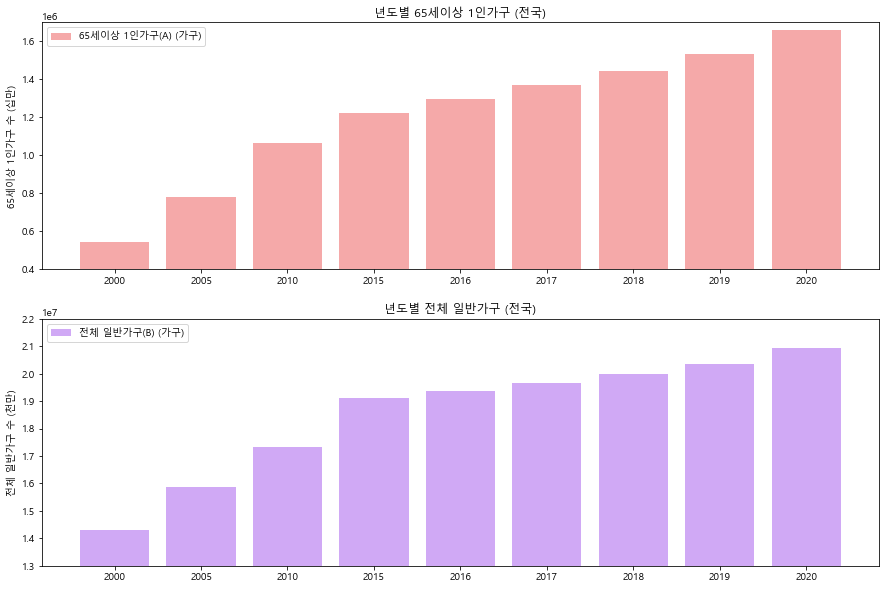

In [30]:
# bar
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.bar(x_noin_1, y_noin_1,color = '#F5A9A9', label = '65세이상 1인가구(A) (가구)')
plt.title('년도별 65세이상 1인가구 (전국)')
plt.ylim(400000,1700000)
plt.ylabel('65세이상 1인가구 수 (십만)')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(x_noin_2, y_noin_2, color = '#D0A9F5', label = '전체 일반가구(B) (가구)')
plt.title('년도별 전체 일반가구 (전국)')
plt.ylim(13000000,22000000)
plt.ylabel('전체 일반가구 수 (천만)')
plt.legend(loc='upper left')

([<matplotlib.axis.YTick at 0x264b21876d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

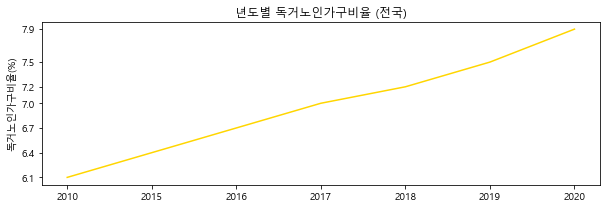

In [31]:
plt.figure(figsize=(10,3))

plt.title('년도별 독거노인가구비율 (전국)')
plt.plot(x_noin_b[2:],y_noin_b[2:],color='#FFD600')
plt.ylabel('독거노인가구비율(%)')
plt.yticks(y_noin_b[2:])
# plt.xticks(x)

### 연도별 무연고 사망자

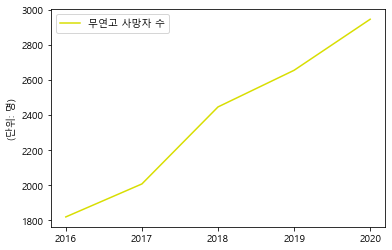

In [32]:
mu = df['연도별_무연고_사망자.csv']
a = mu.T[0]
plt.plot(a, color = '#D8DE02', label = '무연고 사망자 수')
plt.ylabel('(단위: 명)')
plt.legend()

### ECOS_TABLE

In [33]:
eco = df['ECOS_TABLE_2.csv']
eco

,항목명1,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
0,농림수산품,97.08,101.24,98.88,100.61,102.83,100.68,102.84,103.07,99.91,...,139.28,135.18,133.53,133.92,136.07,136.96,135.90,129.51,131.45,134.87
1,광산품,99.92,99.72,99.39,99.22,99.42,99.74,99.87,100.08,101.30,...,113.44,113.91,116.13,121.38,122.04,122.06,123.15,126.27,126.92,126.97
2,공산품,101.49,101.32,101.64,101.29,101.64,101.70,100.81,99.76,98.96,...,105.57,107.46,108.80,109.69,111.42,112.13,112.77,115.10,116.17,115.47
3,"전력,가스,수도및폐기물",104.79,104.84,101.28,101.31,98.11,98.11,97.72,97.41,98.66,...,96.99,97.55,96.61,96.94,96.38,97.46,99.43,101.68,103.77,105.43


In [34]:
col = eco.columns[1:]
col

Index(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
       '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
       '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
       '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
       '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
       '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
       '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
       '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
       '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
       '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
       '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',

In [35]:
eco.iloc[0]

항목명1              농림수산품
2015-01-01        97.08
2015-02-01       101.24
2015-03-01        98.88
2015-04-01       100.61
                ...    
2021-08-01       136.96
2021-09-01        135.9
2021-10-01       129.51
2021-11-01       131.45
2021-12-01       134.87
Name: 0, Length: 85, dtype: object

In [36]:
n = 1
for i in range(7):
    n += 12
    print(n)

13
25
37
49
61
73
85


In [37]:
eco.iloc[0][73:85]

2021-01-01    135.26
2021-02-01    139.42
2021-03-01    139.28
2021-04-01    135.18
2021-05-01    133.53
2021-06-01    133.92
2021-07-01    136.07
2021-08-01    136.96
2021-09-01     135.9
2021-10-01    129.51
2021-11-01    131.45
2021-12-01    134.87
Name: 0, dtype: object

In [38]:
eco0_dict = {}
eco0_dict['2016'] = round(eco.iloc[0][13:25].mean(),1)
eco0_dict['2017'] = round(eco.iloc[0][25:37].mean(),1)
eco0_dict['2018'] = round(eco.iloc[0][37:49].mean(),1)
eco0_dict['2019'] = round(eco.iloc[0][49:61].mean(),1)
eco0_dict['2020'] = round(eco.iloc[0][61:73].mean(),1)
eco0_dict['2021'] = round(eco.iloc[0][73:85].mean(),1)

eco0_dict



{'2016': 105.8,
 '2017': 112.6,
 '2018': 116.6,
 '2019': 114.0,
 '2020': 124.9,
 '2021': 135.1}

In [39]:
eco1_dict = {}
eco1_dict['2016'] = round(eco.iloc[1][13:25].mean(),1)
eco1_dict['2017'] = round(eco.iloc[1][25:37].mean(),1)
eco1_dict['2018'] = round(eco.iloc[1][37:49].mean(),1)
eco1_dict['2019'] = round(eco.iloc[1][49:61].mean(),1)
eco1_dict['2020'] = round(eco.iloc[1][61:73].mean(),1)
eco1_dict['2021'] = round(eco.iloc[1][73:85].mean(),1)

eco1_dict

{'2016': 104.0,
 '2017': 109.1,
 '2018': 114.5,
 '2019': 115.3,
 '2020': 112.7,
 '2021': 120.0}

In [40]:
eco2_dict = {}
eco2_dict['2016'] = round(eco.iloc[2][13:25].mean(),1)
eco2_dict['2017'] = round(eco.iloc[2][25:37].mean(),1)
eco2_dict['2018'] = round(eco.iloc[2][37:49].mean(),1)
eco2_dict['2019'] = round(eco.iloc[2][49:61].mean(),1)
eco2_dict['2020'] = round(eco.iloc[2][61:73].mean(),1)
eco2_dict['2021'] = round(eco.iloc[2][73:85].mean(),1)

eco2_dict

{'2016': 96.5,
 '2017': 101.1,
 '2018': 103.3,
 '2019': 102.3,
 '2020': 99.6,
 '2021': 110.0}

In [41]:
eco3_dict = {}
eco3_dict['2016'] = round(eco.iloc[3][13:25].mean(),1)
eco3_dict['2017'] = round(eco.iloc[3][25:37].mean(),1)
eco3_dict['2018'] = round(eco.iloc[3][37:49].mean(),1)
eco3_dict['2019'] = round(eco.iloc[3][49:61].mean(),1)
eco3_dict['2020'] = round(eco.iloc[3][61:73].mean(),1)
eco3_dict['2021'] = round(eco.iloc[3][73:85].mean(),1)

eco3_dict

{'2016': 94.2,
 '2017': 95.7,
 '2018': 96.2,
 '2019': 98.4,
 '2020': 98.1,
 '2021': 98.6}

In [42]:
x_eco0 = list(eco0_dict.keys())
y_eco0 = list(map(int, eco0_dict.values())) 

x_eco1 = list(eco1_dict.keys())
y_eco1 = list(map(int, eco1_dict.values())) 

x_eco2 = list(eco2_dict.keys())
y_eco2 = list(map(int, eco2_dict.values())) 

x_eco3 = list(eco3_dict.keys())
y_eco3 = list(map(int, eco3_dict.values())) 


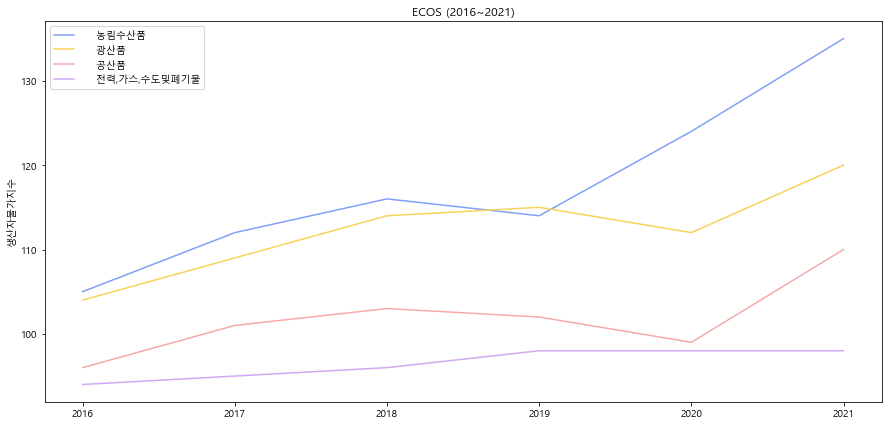

In [48]:
plt.figure(figsize=(15,7))
plt.plot(x_eco0,y_eco0,label=eco.iloc[0][0], color = '#819FF7')
plt.plot(x_eco1,y_eco1,label=eco.iloc[1][0], color = '#F7D358')
plt.plot(x_eco2,y_eco2,label=eco.iloc[2][0], color = '#F5A9A9')
plt.plot(x_eco3,y_eco3,label=eco.iloc[3][0], color = '#D0A9F5')
plt.title('ECOS (2016~2021)')
plt.ylabel('생산자물가지수')

plt.legend()

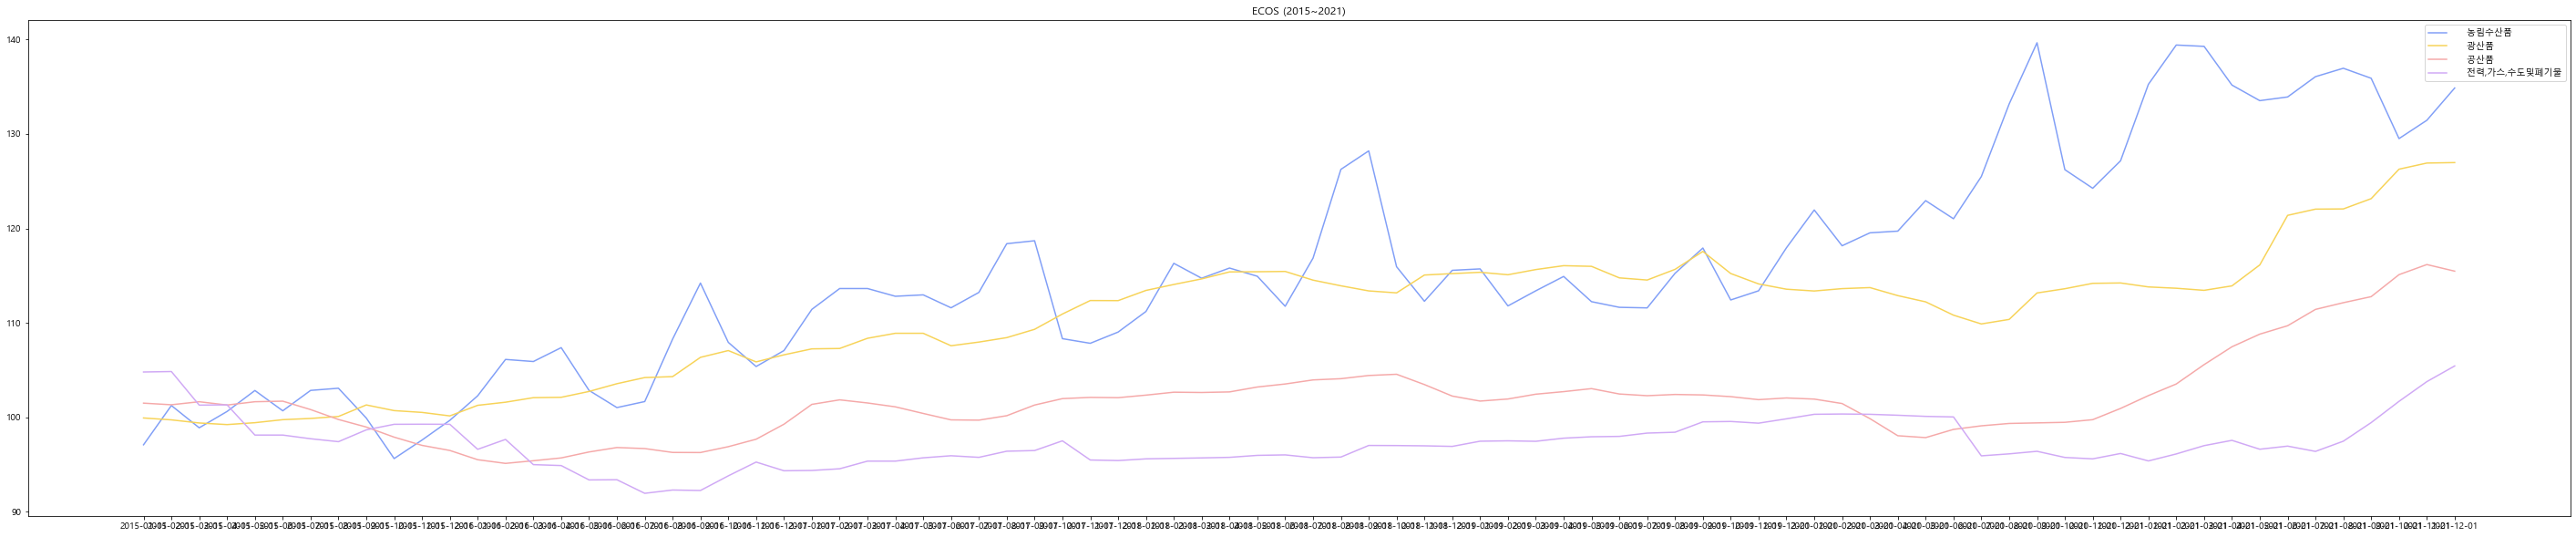

In [44]:
plt.figure(figsize=(50,10))
plt.plot(col,eco.iloc[0][1:],label=eco.iloc[0][0], color = '#819FF7')
plt.plot(col,eco.iloc[1][1:],label=eco.iloc[1][0], color = '#F7D358')
plt.plot(col,eco.iloc[2][1:],label=eco.iloc[2][0], color = '#F5A9A9')
plt.plot(col,eco.iloc[3][1:],label=eco.iloc[3][0], color = '#D0A9F5')
plt.title('ECOS (2015~2021)')

plt.legend()

In [45]:
eco[eco['항목명1'] == '    농림수산품']


,항목명1,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
0,농림수산품,97.08,101.24,98.88,100.61,102.83,100.68,102.84,103.07,99.91,...,139.28,135.18,133.53,133.92,136.07,136.96,135.9,129.51,131.45,134.87


In [46]:
row[0]

NameError: name 'row' is not defined